In [139]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Total number of patients: 569
Number of attributes (categories): 32

Number of patients in each target class:
 diagnosis
B    357
M    212
Name: count, dtype: int64


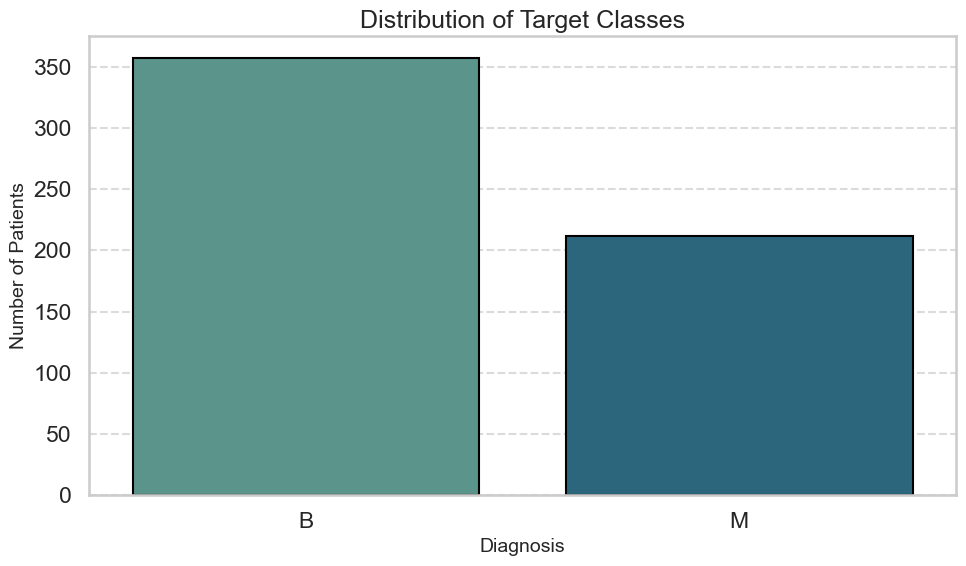


Optimal K value based on the square root method: 23
The optimal K value based on the error rate plot is: 11


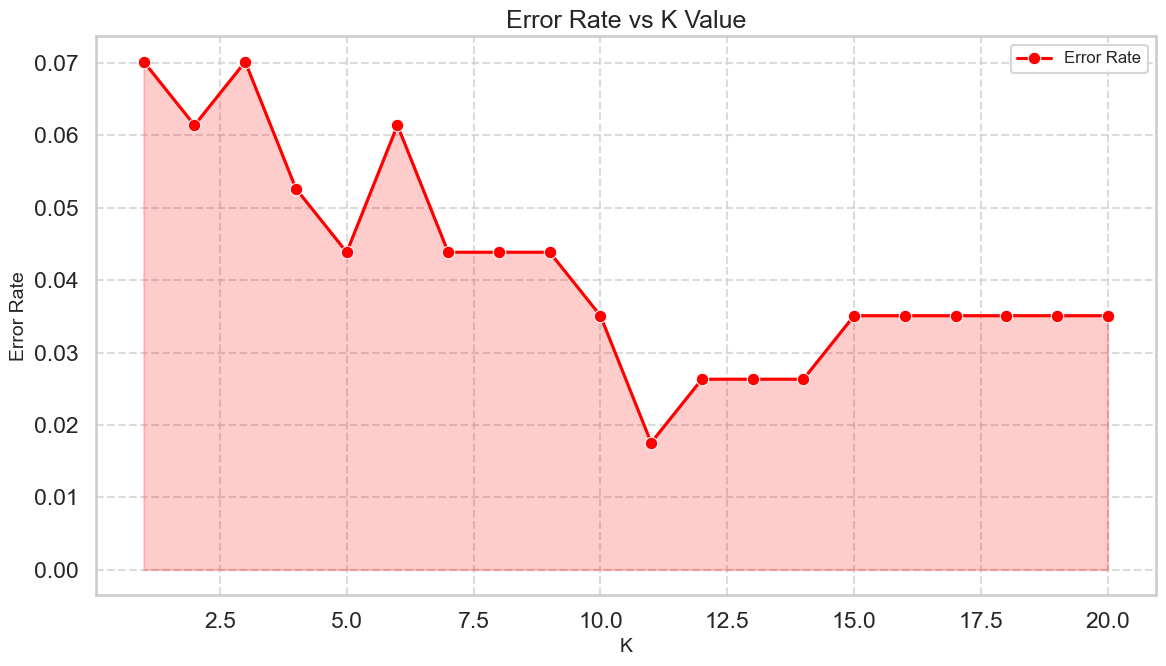

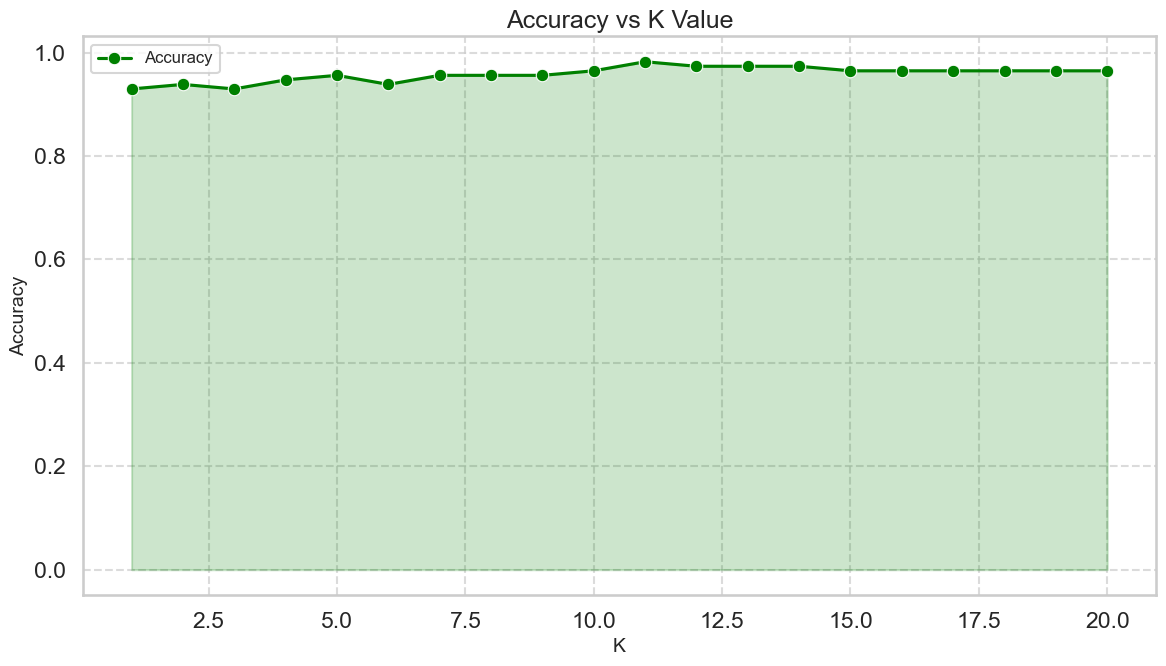

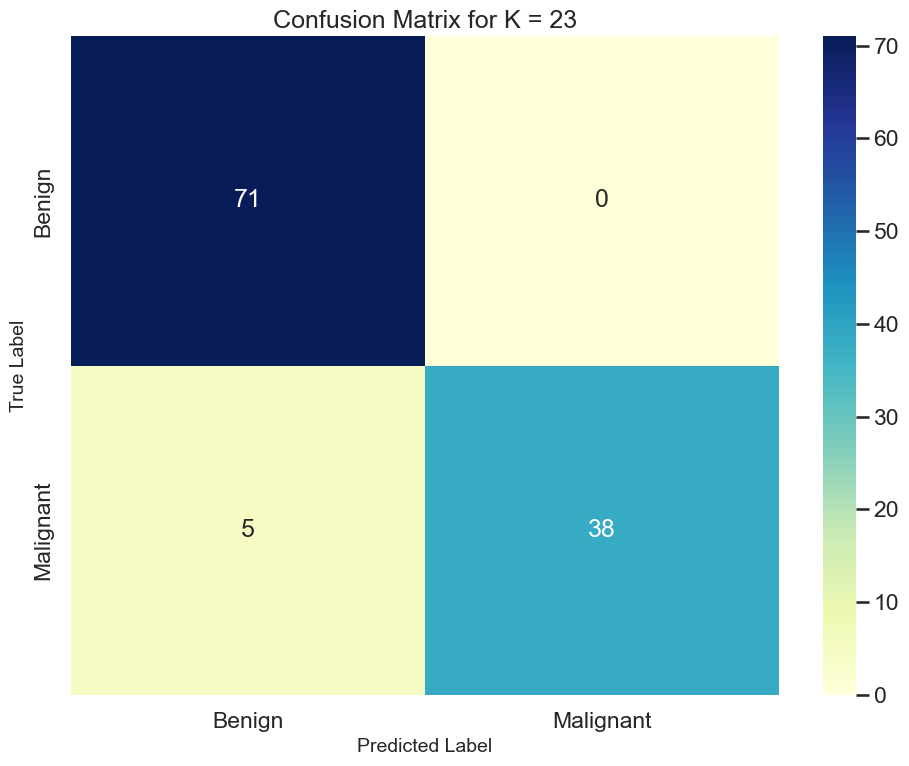

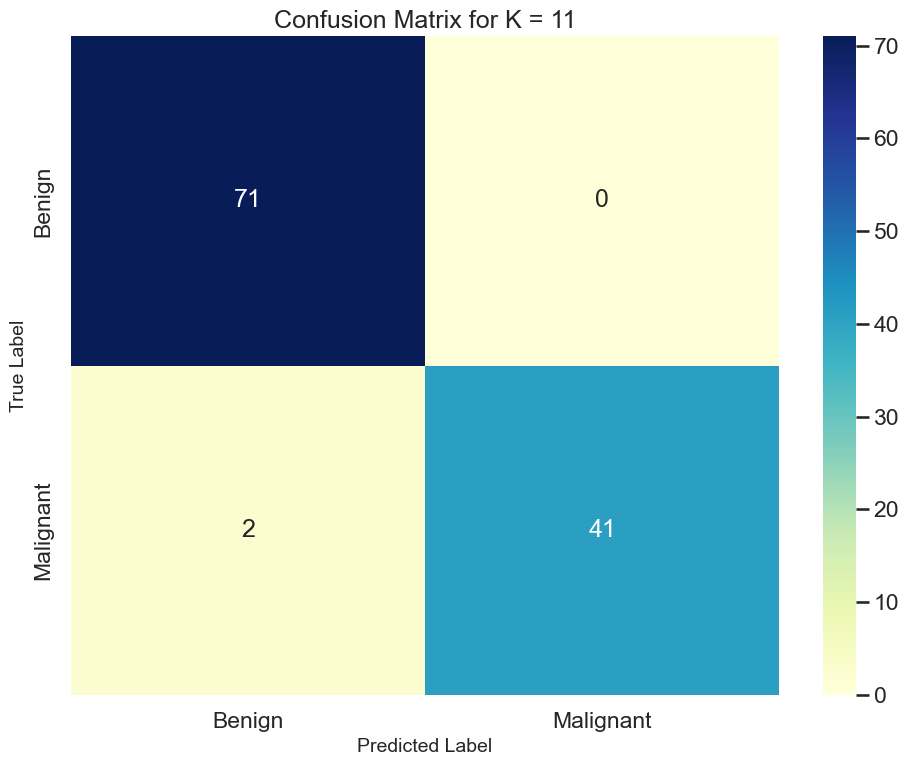

In [140]:

# global viz setting
sns.set(style="whitegrid", context="talk", palette="deep")

file_path = './KNNAlgorithmDataset.csv' 
data = pd.read_csv(file_path)

total_patients = data.shape[0]

num_attributes = data.drop(columns=['diagnosis']).shape[1]

print(f"Total number of patients: {total_patients}")
print(f"Number of attributes (categories): {num_attributes}")
print("\nNumber of patients in each target class:\n", data['diagnosis'].value_counts())

# Visualization for target class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=data['diagnosis'].value_counts().index, y=data['diagnosis'].value_counts().values, palette="crest", edgecolor="black")
plt.title('Distribution of Target Classes', fontsize=18)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Determine the optimal K value using two methods
# Method 1: Square root of the sample size
optimal_k_sqrt = int(np.sqrt(total_patients))
print(f"\nOptimal K value based on the square root method: {optimal_k_sqrt}")

# Method 2: Determine K using the error plot
columns_to_drop = ['diagnosis', 'id']
if 'Unnamed: 32' in data.columns:
    columns_to_drop.append('Unnamed: 32')

# Drop unnecessary columns
X = data.drop(columns=columns_to_drop)  
y = data['diagnosis'].map({'M': 1, 'B': 0}) 

# Convert to numeric
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = np.ascontiguousarray(X_train, dtype=np.float64)
X_test = np.ascontiguousarray(X_test, dtype=np.float64)

# Try different K values and calculate error rates
error_rates = []
accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(np.mean(y_pred != y_test))
    accuracies.append(accuracy_score(y_test, y_pred))

# Identify optimal K based on error plot
optimal_k_error_plot = np.argmin(error_rates) + 1
print(f"The optimal K value based on the error rate plot is: {optimal_k_error_plot}")

# Visualization: Error Rate vs K Value
plt.figure(figsize=(12, 7))
sns.lineplot(x=range(1, 21), y=error_rates, marker='o', color='red', label='Error Rate')
plt.fill_between(range(1, 21), error_rates, alpha=0.2, color='red')
plt.title('Error Rate vs K Value', fontsize=18)
plt.xlabel('K', fontsize=14)
plt.ylabel('Error Rate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Visualization: Accuracy vs K Value
plt.figure(figsize=(12, 7))
sns.lineplot(x=range(1, 21), y=accuracies, marker='o', color='green', label='Accuracy')
plt.fill_between(range(1, 21), accuracies, alpha=0.2, color='green')
plt.title('Accuracy vs K Value', fontsize=18)
plt.xlabel('K', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Apply K-NN using both K values (square root and error plot)
k_values = [optimal_k_sqrt, optimal_k_error_plot]
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    results.append({'K': k, 'Accuracy': accuracy, 'Confusion Matrix': confusion})
    
    # confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion, annot=True, cmap="YlGnBu", fmt="d", cbar=True,
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f'Confusion Matrix for K = {k}', fontsize=18)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.tight_layout()
    plt.show()



Comparison of Classification Accuracies for Selected K Values:
     K  Accuracy
0  23  0.956140
1  11  0.982456


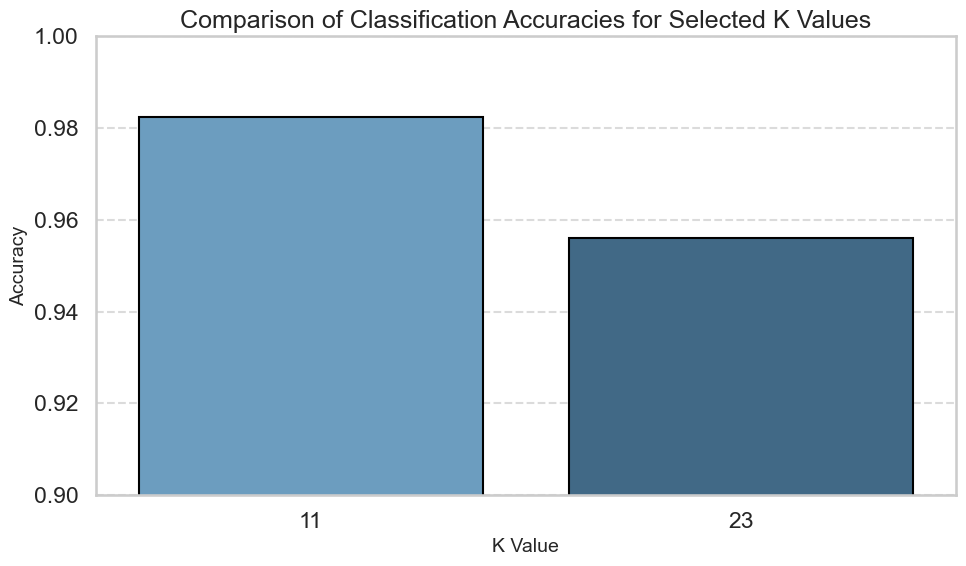


Comparison of Misclassified Patients:
     K  Misclassified Benign  Misclassified Malignant
0  23                     5                        0
1  11                     2                        0


<Figure size 1200x700 with 0 Axes>

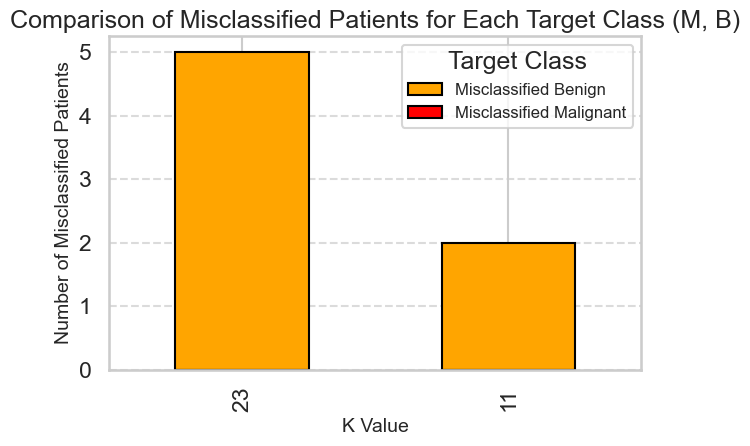

In [141]:

accuracy_comparison = pd.DataFrame(results)[['K', 'Accuracy']]
print("\nComparison of Classification Accuracies for Selected K Values:\n", accuracy_comparison)

# Visualization: Comparison of classification accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x='K', y='Accuracy', data=accuracy_comparison, palette='Blues_d', edgecolor="black")
plt.title('Comparison of Classification Accuracies for Selected K Values', fontsize=18)
plt.xlabel('K Value', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.9, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


misclassified_comparison = []
for result in results:
    confusion = result['Confusion Matrix']
    misclassified_benign = confusion[1][0]  # False negatives (Benign misclassified as Malignant)
    misclassified_malignant = confusion[0][1]  # False positives (Malignant misclassified as Benign)
    misclassified_comparison.append({
        'K': result['K'],
        'Misclassified Benign': misclassified_benign,
        'Misclassified Malignant': misclassified_malignant
    })

misclassified_df = pd.DataFrame(misclassified_comparison)
print("\nComparison of Misclassified Patients:\n", misclassified_df)

# Visualization: Comparison of misclassified cases
plt.figure(figsize=(12, 7))
misclassified_df.set_index('K')[['Misclassified Benign', 'Misclassified Malignant']].plot(kind='bar', stacked=True, color=['orange', 'red'], edgecolor="black")
plt.title('Comparison of Misclassified Patients for Each Target Class (M, B)', fontsize=18)
plt.xlabel('K Value', fontsize=14)
plt.ylabel('Number of Misclassified Patients', fontsize=14)
plt.legend(title='Target Class', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [142]:
total_patients = data.shape[0]

num_attributes = data.drop(columns=['diagnosis']).shape[1]

data_types = data.dtypes

missing_values = data.isnull().sum()

target_distribution = data['diagnosis'].value_counts()

print(f"Total number of patients: {total_patients}")
print(f"Number of attributes (categories): {num_attributes}")
print("\nData Types:\n", data_types)
print("\nMissing Values:\n", missing_values)
print("\nNumber of patients in each target class:\n", target_distribution)

Total number of patients: 569
Number of attributes (categories): 32

Data Types:
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothne